In [2]:
import numpy as np
import soundfile as sf
from beamformer import delaysum as ds
from beamformer import util
import glob
import os
from pathlib import Path
from IPython.display import Audio
import torch
import matplotlib.pyplot as plt


SAMPLING_FREQUENCY = 16000
FFT_LENGTH = 512
FFT_SHIFT = 256
ENHANCED_WAV_NAME = './output/enhanced_speech_delaysum.wav'
MIC_ANGLE_VECTOR = np.arange(8, dtype="float32") * (360 / 8)+0
print(MIC_ANGLE_VECTOR)
LOOK_DIRECTION = 135
MIC_DIAMETER = 0.15

[  0.  45.  90. 135. 180. 225. 270. 315.]


In [16]:
def get_steer_vector(azimuth, elevation):
    # def normalize(steering_vector):
    #     for ii in range(0, FFT_LENGTH):
    #         weight = np.matmul(np.conjugate(steering_vector[:, ii]).T, steering_vector[:, ii])
    #         steering_vector[:, ii] = (steering_vector[:, ii] / weight)
    #     return steering_vector

    number_of_mic = 8
    # azimuth=45
    # elevation=45
    frequency_vector = np.linspace(0, int(16000 / 2), int(FFT_LENGTH / 2 + 1))
    frequency_vector = frequency_vector[1:]  #
    steering_vector = np.ones((len(frequency_vector), number_of_mic), dtype=np.complex64)
    # c_vector=np.ones((),dtype=np.complex64)
    filter = np.ones((len(frequency_vector), number_of_mic), dtype=np.complex64)
    unit_vector = np.array(
        [
            np.cos(np.deg2rad(azimuth)) * np.cos(np.deg2rad(elevation)),
            np.sin(np.deg2rad(azimuth)) * np.cos(np.deg2rad(elevation)),
            np.sin(np.deg2rad(elevation)),
        ]
    )
    response = np.ones((len(frequency_vector), number_of_mic), dtype=np.complex64)
    for f, frequency in enumerate(frequency_vector):
        # d_steering=np.ones((number_of_mic,1),dtype=np.complex64)
        for m, mic_angle in enumerate(MIC_ANGLE_VECTOR):
            mic_loc = np.array(
                [np.cos(np.deg2rad(mic_angle)), np.sin(np.deg2rad(mic_angle)), 0]
            ) * (
                MIC_DIAMETER / 2
            )  # micro coordinates
            steering_angle = np.dot(unit_vector.T, mic_loc)
            # print(steering_angle)

            # print(d_steering[m])
            steering_vector[f, m] = np.complex(
                np.exp((-2j) * ((np.pi * frequency) / 343) * steering_angle)
            )
            # steering=np.complex(np.exp(( - 2j) * ((np.pi * frequency) / 343) \
            #                    * steering_angle))
        # print(d_steering.shape)
        # a_matrix = np.dot(steering_vector[f],np.conjugate(steering_vector[f]).T)*np.cos(np.deg2rad(elevation))
        # # print(a_matrix.shape)
        # # print(a_matrix)
        # c_vector=steering_vector[f].squeeze(1)*np.cos(np.deg2rad(elevation))
        # # print(c_vector.shape)
        # # print(c_vector)
        # w=np.dot(np.linalg.inv(a_matrix),c_vector)
        # # print(w.shape)
        # filter[f]=w
        # response[f]=np.dot(np.conjugate(w).T,steering_vector[f])
        #
        # break
    # steering_vector = np.conjugate(steering_vector).T
    # A=np.dot(steering_vector,np.conjugate(steering_vector).T)*np.cos(np.deg2rad(elevation))
    # normalize_steering_vector = normalize(steering_vector)
    # return normalize_steering_vector[:, 0:np.int(FFT_LENGTH / 2) + 1]
    # C=steering_vector*np.cos(np.deg2rad(elevation))

    return steering_vector


# filter=get_steer_value(60,45)
# print(filter[0,0])
# w=np.ones((FFT_LENGTH, 8),dtype=np.complex64)
for azimuth in range(50, 60):
    for elevation in range(30, 45):
        steering_vector = get_steer_vector(azimuth, elevation)
        print(np.real(steering_vector[:, 0].shape))
        # steering_vector=
# print(w.shape)

# plt.plot(w[:,0])
# plt.xlabel('Frequency')
# plt.ylabel('Value')
# plt.title('Vector with Frequency on the X-Axis')
# plt.show()

/var/folders/l5/9kglh8tx5nb_wn200vv8zgwh00mc7h/T/ipykernel_51217/801402770.py:30: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  steering_vector[f, m] = np.complex(np.exp(( - 2j) * ((np.pi * frequency) / 343) \


[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]
[256]


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# Create an empty list to store the data
azimuth_values = []
elevation_values = []
steering_vector_values = []

# Nested loop to iterate over azimuth and elevation values
for azimuth in range(0, 360):
    for elevation in range(30, 45):
        # Calculate the steering vector for the current azimuth and elevation
        steering_vector = get_steer_vector(azimuth, elevation)
        chn1_steering_vector = np.real(steering_vector[:, 0])
        # Append the values to the respective lists
        azimuth_values.append(azimuth)
        elevation_values.append(elevation)
        steering_vector_values.append(chn1_steering_vector.tolist())

# # Convert azimuth and elevation to radians
# azimuth_values = np.radians(azimuth_values)
# elevation_values = np.radians(elevation_values)

# # Calculate Cartesian coordinates
# x = np.sin(elevation_values) * np.cos(azimuth_values)
# y = np.sin(elevation_values) * np.sin(azimuth_values)
# z = np.cos(elevation_values)

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c=steering_vector_values[0], marker='o')
# # Plot the data points
# # ax.scatter(azimuth_values, elevation_values, steering_vector_values, c='b', marker='o')

# # Set axis labels
# ax.set_xlabel('Azimuth')
# ax.set_ylabel('Elevation')
# ax.set_zlabel('Steering Vector')
# # Set spherical aspect ratio
# ax.set_box_aspect([1, 1, 1])

# # Create a color bar for the color mapping
# cbar = fig.colorbar(ax.scatter(x, y, z, c=steering_vector_values, cmap='viridis', marker='o'))
# cbar.set_label('Steering Vector Value')
# # Show the plot
# plt.show()

/var/folders/l5/9kglh8tx5nb_wn200vv8zgwh00mc7h/T/ipykernel_51217/801402770.py:30: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  steering_vector[f, m] = np.complex(np.exp(( - 2j) * ((np.pi * frequency) / 343) \


In [42]:
print(len(steering_vector_values))
for s in steering_vector_values:
    print(len(s))
    break

150
256


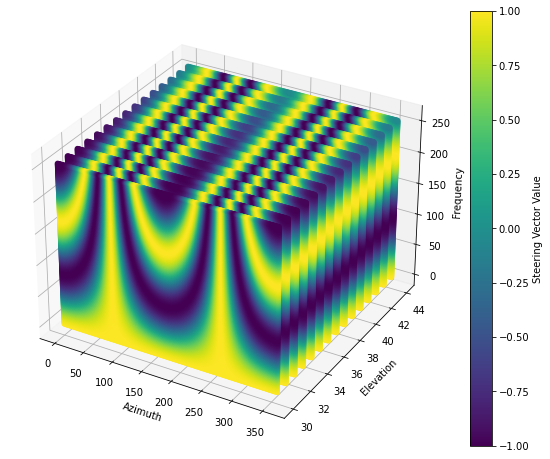

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Assuming you already have azimuth_values, elevation_values, and steering_vector_values
# Ensure that the lists have the same number of elements (150 in this case)

# Assuming steering_vector_values is a list of lists with shape (150, 256)
# You can also convert it to a NumPy array if it's not already

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
ax = fig.add_subplot(111, projection='3d')

# Create a list of frequencies, e.g., freq_values
# You can adjust this list based on your actual data
freq_values = range(256)

# Repeat azimuth, elevation, and frequency for all data points
azimuth_values_3d = np.repeat(azimuth_values, len(freq_values))
elevation_values_3d = np.repeat(elevation_values, len(freq_values))
freq_values_3d = np.tile(freq_values, len(azimuth_values))

# Flatten the list of lists to a 1D array for colors
colors = [value for sublist in steering_vector_values for value in sublist]

# Create a 3D scatter plot with colors representing steering vector values
sc = ax.scatter(azimuth_values_3d, elevation_values_3d, freq_values_3d, c=colors, cmap='viridis')

# Set axis labels
ax.set_xlabel('Azimuth')
ax.set_ylabel('Elevation')
ax.set_zlabel('Frequency')

# Create a color bar for the color mapping
cbar = fig.colorbar(sc)
cbar.set_label('Steering Vector Value')

# Show the plot
plt.show()


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have azimuth_values, elevation_values, and steering_vector_values
# Ensure that the lists have the same number of elements (150 in this case)

# Assuming steering_vector_values is a list of lists with shape (150, 256)
# You can also convert it to a NumPy array if it's not already

# List of specific frequencies you want to plot
freq_values = [0, 64, 128, 255]

# Filter the data for the specific frequencies
filtered_azimuth_values = np.repeat(azimuth_values, len(freq_values))
filtered_elevation_values = np.repeat(elevation_values, len(freq_values))
filtered_freq_values = np.tile(freq_values, len(azimuth_values))

# Extract steering_vector_values for specific frequencies
steering_vector_values = [steering_vector_values[i] for i in range(len(azimuth_values)) for _ in range(len(freq_values))]
steering_vector_values = np.array(steering_vector_values).flatten()
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))  # Adjust the figsize as needed
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot with colors representing steering vector values
sc = ax.scatter(filtered_azimuth_values, filtered_elevation_values, filtered_freq_values, c=steering_vector_values, cmap='viridis')

# Set axis labels
ax.set_xlabel('Azimuth')
ax.set_ylabel('Elevation')
ax.set_zlabel('Frequency')

# Create a color bar for the color mapping
cbar = fig.colorbar(sc)
cbar.set_label('Steering Vector Value')

# Show the plot
plt.show()


IndexError: index 16 is out of bounds for axis 0 with size 16

In [62]:
print(steering_vector_values.shape)

(16,)


In [19]:
def get_steer_value(azimuth_list, elevation_list):
    # def normalize(steering_vector):
    #     for ii in range(0, FFT_LENGTH):
    #         weight = np.matmul(np.conjugate(steering_vector[:, ii]).T, steering_vector[:, ii])
    #         steering_vector[:, ii] = (steering_vector[:, ii] / weight)
    #     return steering_vector
    number_of_mic = 8
    # azimuth=45
    # elevation=45
    frequency_vector = np.linspace(0, int(16000 / 2), int(FFT_LENGTH / 2 + 1))
    frequency_vector = frequency_vector[1:]  #

    d_a_matrix = np.ones((len(frequency_vector), number_of_mic, number_of_mic), dtype=np.complex64)
    d_c_vector = np.ones((len(frequency_vector), number_of_mic), dtype=np.complex64)
    steering_vector = np.ones((len(frequency_vector), number_of_mic, 1), dtype=np.complex64)
    for azimuth in range(0, 360):
        for elevation in range(-90, 90):
            # steering_vector = np.ones((len(frequency_vector), number_of_mic),dtype=np.complex64)
            # c_vector=np.ones((),dtype=np.complex64)

            unit_vector = np.array(
                [
                    np.cos(np.deg2rad(azimuth)) * np.cos(np.deg2rad(elevation)),
                    np.sin(np.deg2rad(azimuth)) * np.cos(np.deg2rad(elevation)),
                    np.sin(np.deg2rad(elevation)),
                ]
            )

            for f, frequency in enumerate(frequency_vector):
                d_steering = np.ones((number_of_mic, 1), dtype=np.complex64)
                for m, mic_angle in enumerate(MIC_ANGLE_VECTOR):
                    mic_loc = np.array(
                        [np.cos(np.deg2rad(mic_angle)), np.sin(np.deg2rad(mic_angle)), 0]
                    ) * (
                        MIC_DIAMETER / 2
                    )  # micro coordinates
                    steering_angle = np.dot(unit_vector.T, mic_loc)
                    # print(steering_angle)

                    # print(d_steering[m])
                    steering_vector[f, m] = np.complex(
                        np.exp((-2j) * ((np.pi * frequency) / 343) * steering_angle)
                    )
                    # d_steering[m] = np.complex(
                    #     np.exp((-2j) * ((np.pi * frequency) / 343) * steering_angle)
                    # )
                # print(d_steering.shape)
                a_matrix = np.dot(steering_vector[f], np.conjugate(steering_vector[f]).T) * np.cos(
                    np.deg2rad(elevation)
                )
                d_a_matrix[f] += a_matrix
                # print(a_matrix.shape)
                # print(a_matrix) # (8, 8)
                c_vector = steering_vector[f].squeeze(1) * np.cos(np.deg2rad(elevation))
                # print(c_vector.shape)
                # print(c_vector) # (8,)
                if azimuth in azimuth_list and elevation in elevation_list:
                    d_c_vector[f] += c_vector

    filter = np.ones((len(frequency_vector), number_of_mic), dtype=np.complex64)
    response = np.ones((len(frequency_vector), number_of_mic), dtype=np.complex64)
    for f, frequency in enumerate(frequency_vector):
        w = np.dot(np.linalg.inv(d_a_matrix[f]), d_c_vector[f])
        # print(w.shape)  # (8,)
        filter[f] = w
        response[f] = np.dot(np.conjugate(w).T, steering_vector[f])
        #
        # break
    # steering_vector = np.conjugate(steering_vector).T
    # A=np.dot(steering_vector,np.conjugate(steering_vector).T)*np.cos(np.deg2rad(elevation))
    # normalize_steering_vector = normalize(steering_vector)
    # return normalize_steering_vector[:, 0:np.int(FFT_LENGTH / 2) + 1]
    # C=steering_vector*np.cos(np.deg2rad(elevation))

    return response.T


filter = get_steer_value(range(-22, 23), range(30, 45))
print(filter.shape)
# print(filter[0,0])
# response = np.ones((int(FFT_LENGTH / 2), 8), dtype=np.complex64)
# for azimuth in range(-22, 23):
#     for elevation in range(30, 45):
#         if azimuth not in [0]:
#             response += get_steer_value(azimuth, elevation)
# except:
#     print(azimuth,elevation)
# print(response.shape)
# steering_vector=
# print(w.shape)

# plt.plot(w[:,0])
# plt.xlabel('Frequency')
# plt.ylabel('Value')
# plt.title('Vector with Frequency on the X-Axis')
# plt.show()

/var/folders/l5/9kglh8tx5nb_wn200vv8zgwh00mc7h/T/ipykernel_9491/675376307.py:41: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  steering_vector[f, m] = np.complex(


(8, 256)


In [20]:
response_ = np.concatenate((np.ones((8, 1), dtype=np.complex64), filter), axis=1)
print(response_.shape)

(8, 257)


In [9]:
meeting_folder="/Users/ccui/Desktop/AMI_sample/amicorpus/ES2009a"
wavs = glob.glob(os.path.join(meeting_folder, "audio/*"))
array1_list = []
array1_list_torch = []
# wav_multi = np.zeros((len(wav), len(channel_index_vector)), dtype=np.float32)
for wav in wavs:
    mic_type = Path(wav).stem.split(".")[-1].split("-")[0]
    if mic_type in ["Array1"]:
        # array_path_list.append(str(Path(wav)))
        array, fs = sf.read(
        str(Path(wav)),
        dtype="float32",
        )
        # print(array.shape)
        array=array[16000*9:16000*15]
        array1_list_torch.append(torch.from_numpy(array).unsqueeze(0))
        array = array[..., np.newaxis]
        array1_list.append(array)
array1_list=np.concatenate(array1_list, axis=1)
print(array1_list.shape)
array1_list_torch=torch.cat(array1_list_torch, 0).float()


(96000, 8)


In [12]:
from scipy import signal as sg
from scipy.fftpack import fft, ifft

# def m_spec2wav(spectrogram, sampling_frequency, fftl, frame_len, shift_len):
#     channel, n_of_frame, fft_half = np.shape(spectrogram)
#     hanning = sg.hanning(fftl + 1, "periodic")[:-1]
#     cut_data = np.zeros((channel, fftl), dtype=np.complex64)
#     result = np.zeros((channel, sampling_frequency * 60 * 5), dtype=np.float32)
#     start_point = 0
#     end_point = start_point + frame_len
#     for ii in range(0, n_of_frame):
#         half_spec = spectrogram[:, ii, :]
#         cut_data[:, 0 : np.int(fftl / 2) + 1] = half_spec
#         cut_data[:, np.int(fftl / 2) + 1 :] = np.flip(
#             np.conjugate(half_spec[:,1 : np.int(fftl / 2)]), axis=1
#         )
#         cut_data2 = np.real(ifft(cut_data, n=fftl))
#         result[:, start_point:end_point] = result[:, start_point:end_point] + np.real(
#             cut_data2 * hanning.T
#         )
#         start_point = start_point + shift_len
#         end_point = end_point + shift_len
#     return result[:, 0 : end_point - shift_len]

# def apply_beamformer_micro(beamformer, complex_spectrum):
#         number_of_channels, number_of_frames, number_of_bins = np.shape(complex_spectrum)
#         enhanced_spectrum = np.zeros((number_of_channels, number_of_frames, number_of_bins), dtype=np.complex64)
#         for f in range(0, number_of_bins):
#             print("beamformer[:, f].shape")
#             print(beamformer[:, f].shape)
#             print("complex_spectrum[:, :, f].shape")
#             print(complex_spectrum[:, :, f].shape)
            
#             enhanced_spectrum[:, :, f] = np.conjugate(beamformer[:, f]).T.reshape(-1,1)* complex_spectrum[:, :, f]
#             print(enhanced_spectrum[:, f].shape)
#             # print("np.conjugate(beamformer[:, f]).T.shape")
#             # print(np.conjugate(beamformer[:, f]).T.shape)
#         return m_spec2wav(
#             enhanced_spectrum,
#             SAMPLING_FREQUENCY,
#             FFT_LENGTH,
#             FFT_LENGTH,
#             FFT_SHIFT,
#         )



In [21]:
def get_enhenced():
    multi_channels_data = array1_list

    complex_spectrum, _ = util.get_3dim_spectrum_from_data(multi_channels_data, FFT_LENGTH, FFT_SHIFT, FFT_LENGTH)
    # print(complex_spectrum.shape)
    ds_beamformer = ds.delaysum(MIC_ANGLE_VECTOR, MIC_DIAMETER, sampling_frequency=SAMPLING_FREQUENCY, fft_length=FFT_LENGTH, fft_shift=FFT_SHIFT)
    # print(complex_spectrum.shape)
    beamformer = response_
    print(beamformer.shape)

    enhanced_speech = ds_beamformer.apply_beamformer(beamformer, complex_spectrum)
    return enhanced_speech
enhanced_speech=get_enhenced()

(8, 257)


In [16]:
print(enhanced_speech.shape)

(95744,)


In [22]:
Audio(data=enhanced_speech, rate=16000)

In [96]:
print(enhanced_speech.shape)

(95744,)


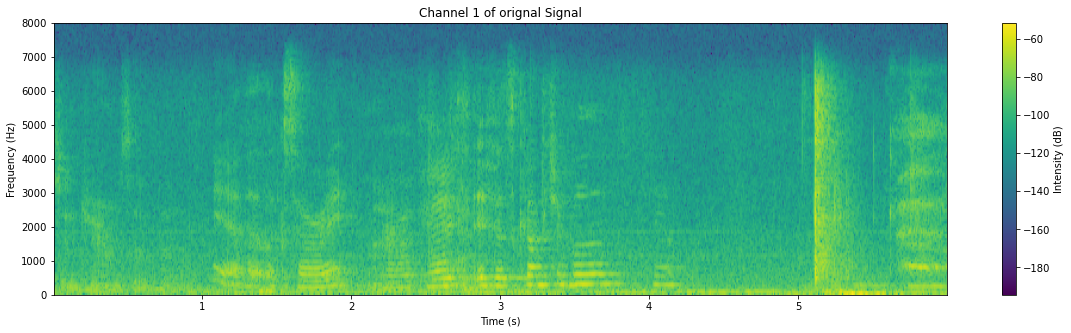

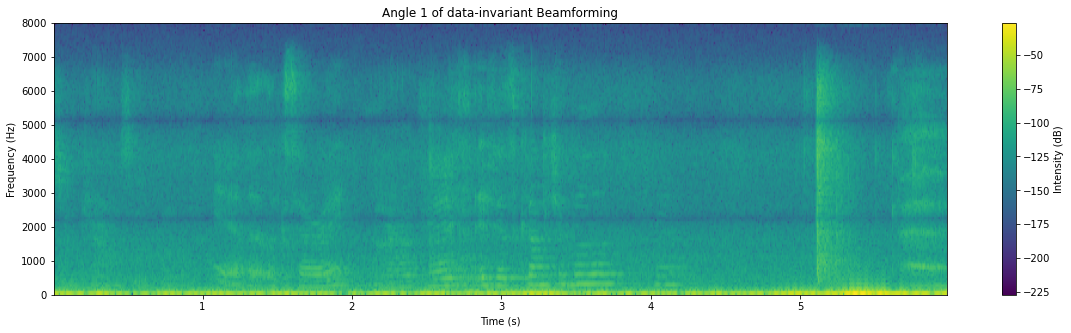

In [23]:
def get_spect(signal,title, vmin=-200, vmax=-60):
    plt.figure(figsize=(20, 5)) 
    # Compute the spectrogram
    Sxx, frequencies ,_,_ = plt.specgram(signal, Fs=16000)
    # mask=frequencies>0
    # Sxx_masked = Sxx[mask, :]
    # sxx=10 * np.log10(Sxx)
    # # norm = Normalize(vmin=-150, vmax=-60)
    # # plt.imshow(sxx, aspect='auto', cmap='inferno', vmin=-150, vmax=-60)
    # plt.imshow(sxx, aspect='auto', cmap='inferno', vmin=vmin, vmax=vmax)
    # plt.gca().invert_yaxis()
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title(title)
    plt.colorbar(label="Intensity (dB)")
    plt.show()
get_spect(array1_list_torch[0],"Channel 1 of orignal Signal")
# get_spect(beamformed_array1,"GCC-Phat Beamforming")
get_spect(enhanced_speech,"Angle 1 of data-invariant Beamforming")

In [ ]:
print()

In [30]:
import numpy as np

# Create two matrices (in NumPy, they are 2D arrays)
matrix1 = np.random.rand(8, 512)  # Replace with your actual data
matrix2 = np.random.rand(512, 8)  # Replace with your actual data

# Perform matrix multiplication
resulting_matrix = matrix1 * matrix2.T

# The resulting_matrix now has dimensions [8, 512]
print(resulting_matrix.shape)

(8, 512)
